### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2019
### Due: Sunday, June 8, 2019
---

## Titanic Midterm Project

## Student: Stephanie Bankes

#### Date: 6/9/2019
---

In [298]:
# Import statements to be used thruhgout the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [299]:
# read the data sets. The titanic data is split into two groups: 1) train- Incldues vsurvived column - used to create model
# 2) test - np survived values- used to measure the efficentcy of the model
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

## Data Exploration

In [300]:
train.shape

(891, 12)

In [301]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
635,636,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S


In [302]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [303]:
# Data statistics for integer and float type attributes
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [304]:
# the number of null values in each column
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Wrangling

In [305]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [306]:
train['SexBinary'] = train.Sex.map({'male': 0, 'female': 1})

In [307]:
train['EmbarkedConverted'] = train.Embarked.map({'S':'0', 'C':'1', 'Q':'2'})

In [308]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBinary,EmbarkedConverted
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [309]:
pclas_map = {1:0,2:1,3:2}
train['Pclass'] = train.Pclass.map(pclas_map)

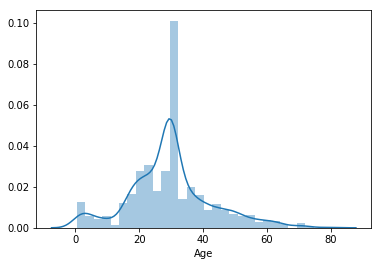

In [310]:
# I decided it would be best to drop missing na values for age, 
# because oterwise our data becomes skewed. For example, 
# If we fill missing values with the mean values our age data looks like this:
sns.distplot(train.Age.fillna(train.Age.mean()))

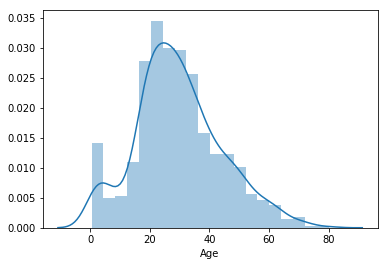

In [311]:
# If we drop na values the distribution looks like this:
sns.distplot(train.Age.dropna())

In [335]:
train.Age.dropna(inplace = True)

In [312]:
# drop cabin row because of large number of missing values
train.drop('Cabin', axis = 1, inplace = True)

In [313]:
# use forward fill to fill in missing values for embarked (Small amount of nan)
train.Embarked.fillna(method = 'ffill',inplace = True)

In [314]:
train.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Embarked               0
SexBinary              0
EmbarkedConverted      2
dtype: int64

In [506]:
# Converts age into 3 bins of equal length for later use
train['AgeNominal'] = pd.cut(train.Age,3,labels = ['young','middle','old'])

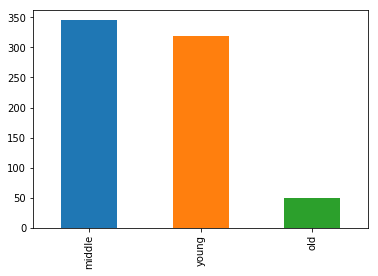

In [343]:
train['AgeNominal'].value_counts().plot.bar()

## Data Visualization

In [344]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SexBinary,EmbarkedConverted,AgeNominal
0,1,0,2,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,young
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,middle
2,3,1,2,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,young
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,middle
4,5,0,2,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,middle


### Gender

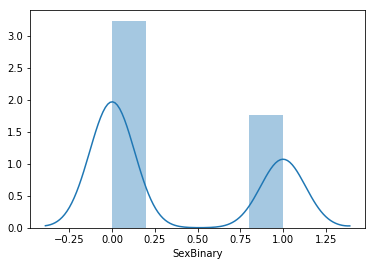

In [330]:
sns.distplot(train.SexBinary)

In [315]:
female_survived.Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [316]:
female_survived.Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

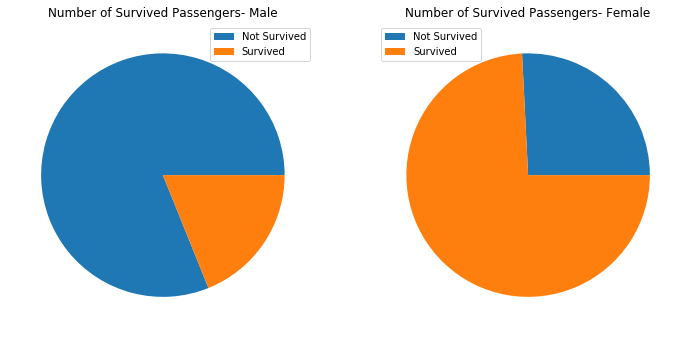

In [317]:
# Show how many survived versus not- Gender
male_survived = train.loc[train['Sex'] == 'male']
female_survived = train.loc[train['Sex'] == 'female']
figure = plt.figure(figsize=(12,10))
axis11 = plt.subplot(1,2,1)
axis12 = plt.subplot(1,2,2)
axis11.pie(male_survived.Survived.value_counts(sort = False))
axis11.set_title("Number of Survived Passengers- Male")
axis11.legend(['Not Survived','Survived'])
axis12.pie(female_survived.Survived.value_counts(sort = False))
axis12.set_title("Number of Survived Passengers- Female")
axis12.legend(['Not Survived','Survived'])

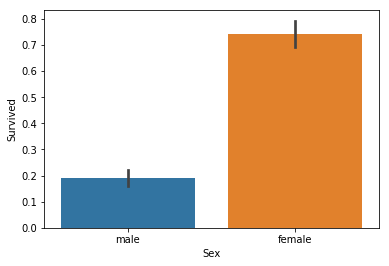

In [318]:
# Percent of survived by gender
sns.barplot(x='Sex', y='Survived', data=train)

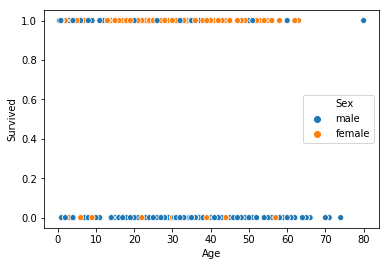

In [505]:
# Scatterplot of male vs femal with age survival
sns.scatterplot(x=train.Age, y=train.Survived, hue=train.Sex)

From these three graphs we can see a strong corolation being survivng and being female. We can see that in the scatterplot there is a large number of orange (female) dots at the top of the graph (survived). The bar chart also shows a much higher percentage of women surviving than men. 

### Pclass

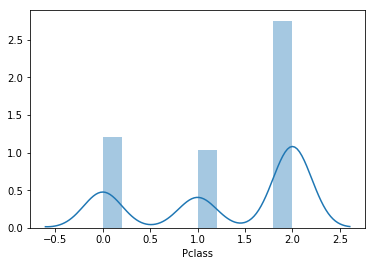

In [332]:
sns.distplot(train.Pclass)

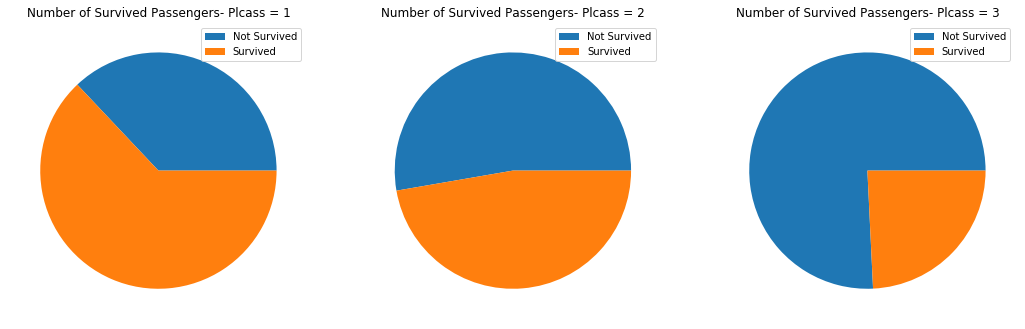

In [320]:
# Number of passenges survived by each class
p1_survived = train.loc[train['Pclass'] == 0]
p2_survived = train.loc[train['Pclass'] == 1]
p3_survived = train.loc[train['Pclass'] == 2]
figure = plt.figure(figsize=(18,15))
axis11 = plt.subplot(1,3,1)
axis12 = plt.subplot(1,3,2)
axis13 = plt.subplot(1,3,3)
axis11.pie(p1_survived.Survived.value_counts(sort = False))
axis11.set_title("Number of Survived Passengers- Plcass = 1")
axis11.legend(['Not Survived','Survived'])
axis12.pie(p2_survived.Survived.value_counts(sort = False))
axis12.set_title("Number of Survived Passengers- Plcass = 2")
axis12.legend(['Not Survived','Survived'])
axis13.pie(p3_survived.Survived.value_counts(sort = False))
axis13.set_title("Number of Survived Passengers- Plcass = 3")
axis13.legend(['Not Survived','Survived'])

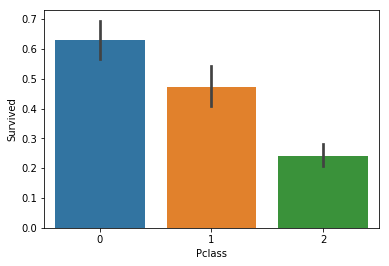

In [321]:
# Shows the percent of people who survived in each Plcass 0:1,1:2,2:3
sns.barplot(x='Pclass', y='Survived', data=train)

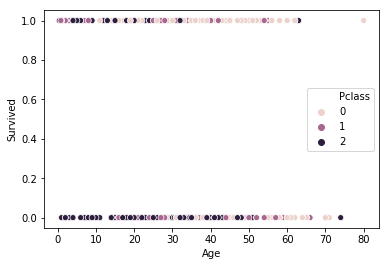

In [322]:
# Scatterplot of age versus survived, with colors representing Pclass
# I used ages on the x axis because it is a continuous variable
sns.scatterplot(x=train.Age, y=train.Survived, hue=train.Pclass)

We can see that there is a difference in survival based on Pclass. It appears that Pclass = 1 had the most number of survivors, while pclass = 3 had the least. 

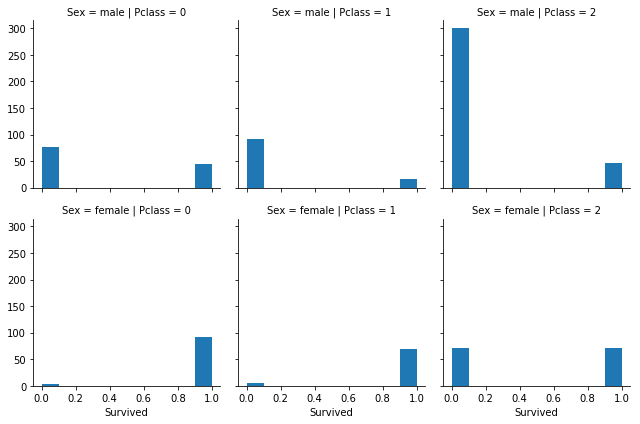

In [323]:
# Vizualizes both class and sex survival. Supports earlier observations
g= sns.FacetGrid(data = train, row = 'Sex', col='Pclass')
g.map(plt.hist, "Survived")

### Age

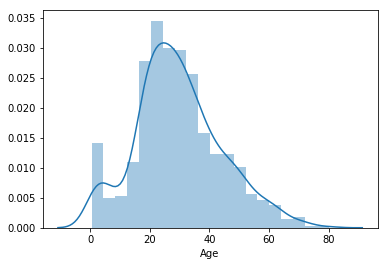

In [336]:
sns.distplot(train.Age)

In [350]:
train.Age.shape

(891,)

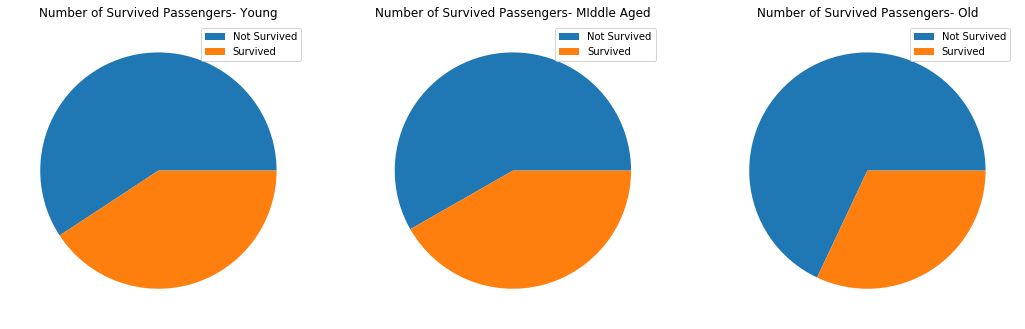

In [352]:
# Number of passenges survived by each age group
young_survived = train.loc[train['AgeNominal'] == 'young']
middle_survived = train.loc[train['AgeNominal'] == 'middle']
old_survived = train.loc[train['AgeNominal'] == 'old']
figure = plt.figure(figsize=(18,15))
axis11 = plt.subplot(1,3,1)
axis12 = plt.subplot(1,3,2)
axis13 = plt.subplot(1,3,3)
axis11.pie(young_survived.Survived.value_counts(sort = False))
axis11.set_title("Number of Survived Passengers- Young")
axis11.legend(['Not Survived','Survived'])
axis12.pie(middle_survived.Survived.value_counts(sort = False))
axis12.set_title("Number of Survived Passengers- MIddle Aged")
axis12.legend(['Not Survived','Survived'])
axis13.pie(old_survived.Survived.value_counts(sort = False))
axis13.set_title("Number of Survived Passengers- Old")
axis13.legend(['Not Survived','Survived'])

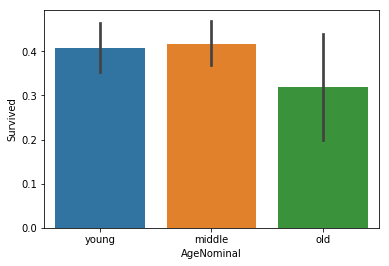

In [347]:
sns.barplot(x='AgeNominal', y='Survived', data=train)

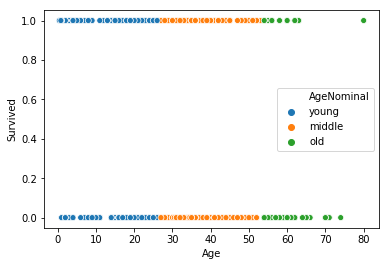

In [354]:
sns.scatterplot(x=train.Age, y=train.Survived, hue=train.AgeNominal)

While I is not as obvious as Pclass or gender, there seems to be a slight coorilation between Age and survial. In the scatterplot, we can see that the number of dots depletes are the end of the "line" for survived increases. We can also see from the pe and bar charts that the 'old' category has a lesse number of survived.

## Parch (parent-child)

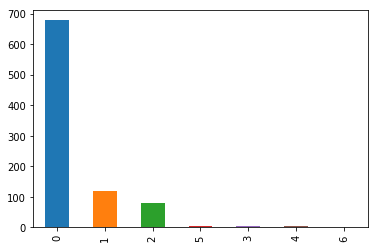

In [504]:
# The most common parch value is 0
# This indicates that the data is not very accuract because it is not likely that the majoirty of people traveled alone
train.Parch.value_counts().plot.bar()

## Modeling
Build a linear model to predict the survived rate I choose to use pclass, age and sex because I saw the most cooralations with those three values and survival. 

In [479]:
from sklearn.linear_model import LogisticRegression

In [480]:
lgcls = LogisticRegression()

In [481]:
X_train = train[['SexBinary','Pclass','Age']]

In [489]:
X_train.fillna(X_test.mean(), inplace = True)

C:\Users\seban\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [483]:
# converts Pclass back to 1,2,3 so it is consitent with test data
pclas_map = {0:1,1:2,2:3}
train['Pclass'] = train.Pclass.map(pclas_map)

In [484]:
# Makes a sex binary row for test data
test['SexBinary'] = test.Sex.map({'male': 0, 'female': 1})

In [485]:
X_test = test[['SexBinary','Pclass','Age']]

In [486]:
X_test.fillna(X_test.mean(), inplace = True)

In [487]:
y_train = train.Survived

In [490]:
lgcls.fit(X_train, y_train)

C:\Users\seban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [491]:
pred = lgcls.predict(X_test)

In [500]:
# Makes predction for test data
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Submission

In [494]:
test = pd.read_csv("test.csv")

In [496]:
passId = test.PassengerId

In [497]:
# Formats reults so it can be prcessed by kaggle
submissions = pd.DataFrame({'PassengerId': passId, 'Survived':pred})
submissions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [499]:
# Convert results to text file
submissions.to_csv("submissions_lg.txt", index=None)